In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [24]:
dt = pd.read_csv("Advertising.csv")

In [25]:
dt.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [26]:
df = pd.DataFrame(data = dt)
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [27]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [28]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [29]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [30]:
df.shape

(200, 4)

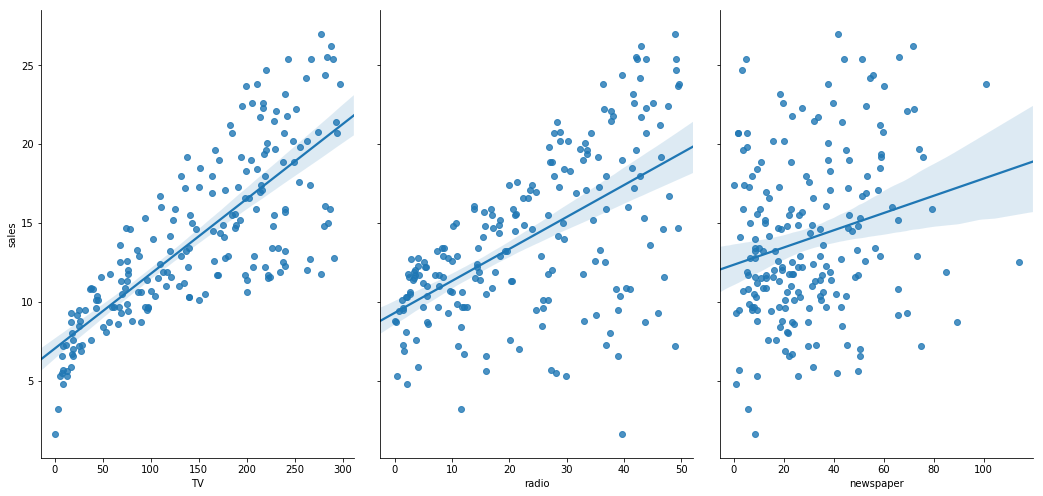

In [31]:
# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(df, x_vars = ['TV', 'radio', 'newspaper'], y_vars= 'sales', size=7, aspect=0.7, kind= 'reg')

In [32]:
# here we can see sales has better relationship with,
# sales is less relatable with radio
# very less sales with newspaper as compare to TV

In [33]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[9.69852266e-01, 9.81522472e-01, 1.77894547e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 6.69578760e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.78354865e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.28640506e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.28180188e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 2.04592999e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 3.24708413e-01, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 8.72486994e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 1.36042422e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 4.30581584e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 2.92486143e-01, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.22232878e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.62704048e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.07502697e

In [34]:
df = df[(z<3).all(axis=1)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [35]:
df.shape

(198, 4)

In [36]:
x = df.iloc[:,0:-1].values

In [37]:
y = df.iloc[:, -1].values

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size= .33, random_state= 47)

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [41]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.8924718415610547

In [42]:
pre = lr.predict(x_test)
pre

array([12.63560054, 19.29021179, 20.69348807,  9.45029007, 14.93037108,
        8.36734007, 16.42273141, 15.66193325, 11.00496185,  8.83854139,
       15.45566107, 14.77940997, 13.13144457,  3.62724262, 23.33878584,
       11.97570605, 14.9313315 , 13.88660348, 20.79187651, 12.58195345,
       12.39018631, 19.34269075, 12.45232567,  7.57588688, 20.89981808,
       18.78063179, 17.33214793,  8.94375473, 17.8322978 ,  7.06034247,
        5.24295309, 14.42656654,  9.69887707, 17.71037769,  8.78213637,
        7.70138911,  6.56941317, 10.21518981, 10.05714817, 21.41397419,
       17.0668821 ,  6.06127294,  4.52482584, 15.70439121,  9.74161834,
        8.34107518, 11.95630452,  8.7306173 , 17.3420214 , 15.33658606,
       14.96695556,  7.38689215,  9.94222719, 14.02533139, 18.44956092,
       12.38447802, 16.39259793, 22.12733121, 16.05872042, 16.96209963,
        6.16453276, 14.00657775,  7.9431177 , 23.29823909, 21.67376144,
       14.14536428])

In [43]:
from sklearn.metrics import r2_score, mean_squared_error

In [44]:
print(r2_score(y_test, pre))
print(mean_squared_error(y_test, pre))

0.8980149282465467
2.7518346746364255


In [45]:
# coefficient and intercept

In [46]:
print(lr.coef_)
print(lr.intercept_)

[0.04583745 0.18668972 0.00314962]
2.8714659352201206


In [47]:
t = np.array([180.0, 10.9, 60.8])
ts= t.reshape(1,-1)
ts

array([[180. ,  10.9,  60.8]])

In [48]:
lr.predict(ts)

array([13.34862152])